# plotting_scratch--skychart

## Jazmin's test plots

### Generating target coordinate data

In [19]:
# plotting_scratch--skychart
#
# A scratchpad for astroplan skychart plots.
#
# Authored by Jazmin Berlanga Medina.
# Summer 2015.
# 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skyfield.api import JulianDate, earth, venus, jupiter, saturn, Star

from datetime import datetime
from pytz import timezone

###################
# Set Dates & Times
###################

# Mountain timezone
mountain = timezone('US/Mountain')

# What time to start/end observing in local timezone
local_start_hour = 20 	# 8:00 pm
#local_start_min = 30
local_end_hour = 23  	# 11:00 pm
#local_end_min = 30

# Observing in
year = 2015
month = 1
day = 15
hour = range(local_start_hour, local_end_hour + 1)

observe_date = []
for i in range(0, len(hour)):
    observe_date.append(mountain.localize(datetime(year, month, day, hour[i])))

jd_1 = JulianDate(observe_date)

###################
# Find Observer-centered Coords
###################

# Kitt Peak - 31.9583° N, 111.5967° W
kittpeak = earth.topos('31.9583 N', '111.5967 W')
location_name = 'Kitt Peak'

# Define star targets.
Sirius = Star(ra_hours=(6, 45, 08.9173), dec_degrees=(-16, 42, 58.017))
Pollux = Star(ra_hours=(7, 45, 19), dec_degrees=(28, 1.584, 0))
Castor = Star(ra_hours=(7, 34, 36), dec_degrees=(31, 53, 18))
Polaris = Star(ra_hours=(2, 31, 48.7), dec_degrees=(89, 15, 51))
Betelgeuse = Star(ra_hours=(5, 55, 10.3053), dec_degrees=(7, 24, 25.426))
Rigel = Star(ra_hours=(5, 14, 32.272), dec_degrees=(-8, 12, 05.91))
Altair = Star(ra_hours=(19, 50, 47), dec_degrees=(8, 52.098, 0))
Deneb = Star(ra_hours=(20, 41, 25.9), dec_degrees=(45, 16, 49))
Vega = Star(ra_hours=(18, 36, 56.3364), dec_degrees=(38, 47, 01.291))
Arcturus = Star(ra_hours=(14, 15, 39.7), dec_degrees=(19, 10, 56))
Spica = Star(ra_hours=(13, 25, 11.5793), dec_degrees=(-11, 9, 40.759))

# Define Messier object targets.
M31 = Star(ra_hours=(0, 42, 44.3), dec_degrees=(41, 16, 10))
M33 = Star(ra_hours=(1, 33, 50.9), dec_degrees=(30, 39, 36))
M13 = Star(ra_hours=(16, 5, 15), dec_degrees=(17, 44, 55))
M1 = Star(ra_hours=(5, 34, 32), dec_degrees=(22, 0.870, 0))
M51 = Star(ra_hours=(13, 29, 52.7), dec_degrees=(47, 11, 43))

# Create dictionary of target data.
targets = [
    Sirius, Pollux, Castor, Polaris, Betelgeuse, Rigel, Altair, 
    Deneb, Vega, Arcturus, Spica, M31, M33, M13, M1, M51
]

target_names = [
    'Sirius', 'Pollux', 'Castor', 'Polaris', 'Betelgeuse', 'Rigel', 
    'Altair', 'Deneb', 'Vega', 'Arcturus', 'Spica', 'M31', 'M33', 
    'M13', 'M1', 'M51'
]

target_data = {key : {} for key in target_names}

# Get alt/az for all objects from apparent positions.
for target in range(0, len(targets)):
    for date in range(0, len(hour)):
        # Calculate altitude and azimuth.
        alt, az = kittpeak(jd_1[date]).observe(targets[target]).apparent().altaz()[:2]
        # Add dictionary for current date to current target.
        target_data[target_names[target]]['datetime '+str(date)] = {
            'date': str(jd_1[date].astimezone(mountain)), 
            'alt' : str(alt.dstr()), 
            'az' : str(az.dstr())
        }                                                   
    #print(str(target_data[target_names[target]]))
    #print("\n")

#


### Making plots

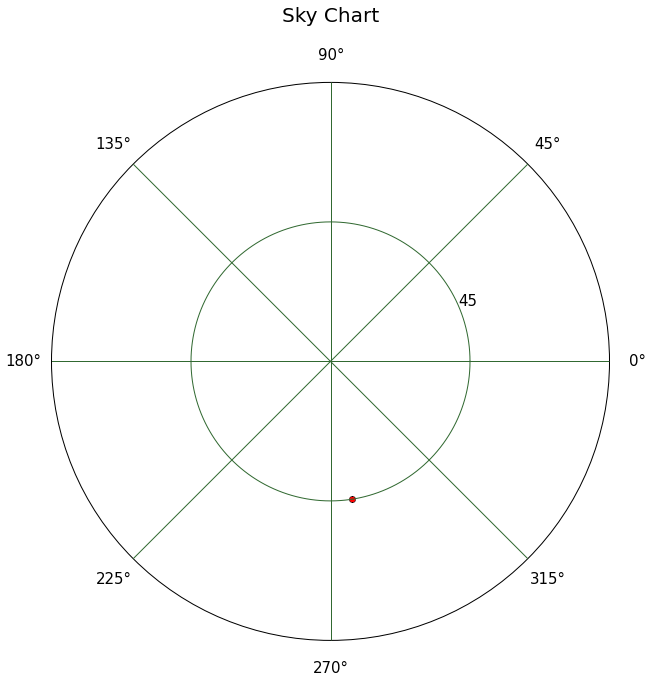

In [49]:
# Pull in input from file.

observing_date = "2015-01-15"

# Set up figure.
fig = plt.figure(figsize=(10,10))

# Set up axes.
ax = plt.gca(polar=True)
ax.set_yticks(range(0, 90, 15))
#ax.set_yticklabels(list(map(str, range(90, 0, -15))))
ax.set_rmax(100)
ax.grid(True)

# Plot points:
ax.plot(30, 45, 'o', color='r')

#for target in range(0, len(targets)):
#    target_plot = ax.plot(az, alt, color='r')
#

# Set labels, title, legend, etc.
plt.title("Sky Chart", y=1.1, size=20)
#ax.set_title("Sky Chart - "+location_name+" - "+observing_date)

plt.show()

## Polar plot examples

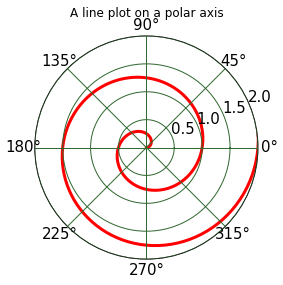

In [29]:
# http://matplotlib.org/examples/pylab_examples/polar_demo.html

"""
Demo of a line plot on a polar axis.
"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


r = np.arange(0, 3.0, 0.01)
theta = 2 * np.pi * r

ax = plt.gca(polar=True)
#plt.setp(xaxis, rotation=70 )
ax.plot(theta, r, color='r', linewidth=3)
ax.set_rmax(2.0)
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

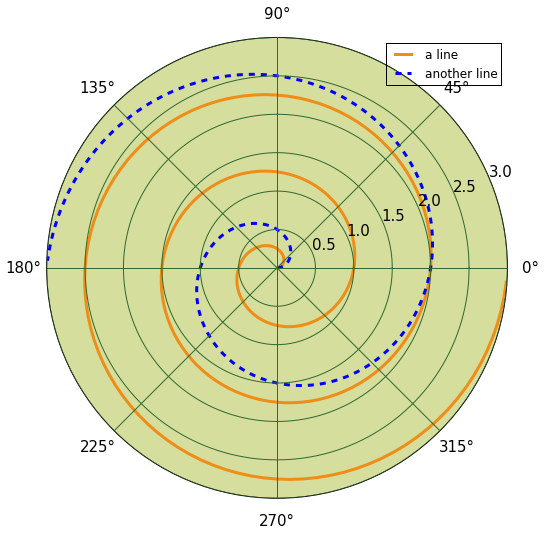

In [32]:
# http://matplotlib.org/examples/pylab_examples/polar_legend.html

#!/usr/bin/env python

import numpy as np
from matplotlib.pyplot import figure, show, rc
%matplotlib inline

# radar green, solid grid lines
#rc('grid', color='#316931', linewidth=1, linestyle='-')
#rc('xtick', labelsize=15)
#rc('ytick', labelsize=15)

# force square figure and square axes looks better for polar, IMO
fig = figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, axisbg='#d5de9c')

r = np.arange(0, 3.0, 0.01)
theta = 2*np.pi*r
ax.plot(theta, r, color='#ee8d18', lw=3, label='a line')
ax.plot(0.5*theta, r, color='blue', ls='--', lw=3, label='another line')
ax.legend()

show()

## Label example

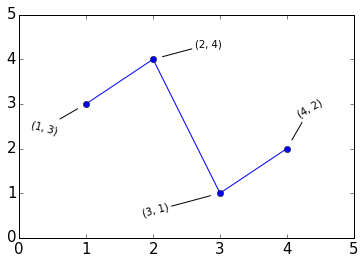

In [30]:
# http://matplotlib.org/examples/pylab_examples/dashpointlabel.html

import matplotlib.pyplot as plt
%matplotlib inline

DATA = ((1, 3),
        (2, 4),
        (3, 1),
        (4, 2))
# dash_style =
#     direction, length, (text)rotation, dashrotation, push
# (The parameters are varied to show their effects,
# not for visual appeal).
dash_style = (
    (0, 20, -15, 30, 10),
    (1, 30, 0, 15, 10),
    (0, 40, 15, 15, 10),
    (1, 20, 30, 60, 10),
    )

fig, ax = plt.subplots()

(x,y) = zip(*DATA)
ax.plot(x, y, marker='o')
for i in range(len(DATA)):
    (x,y) = DATA[i]
    (dd, dl, r, dr, dp) = dash_style[i]
    #print 'dashlen call', dl
    t = ax.text(x, y, str((x,y)), withdash=True,
               dashdirection=dd,
               dashlength=dl,
               rotation=r,
               dashrotation=dr,
               dashpush=dp,
               )

ax.set_xlim((0.0, 5.0))
ax.set_ylim((0.0, 5.0))

plt.show()

## Projections example

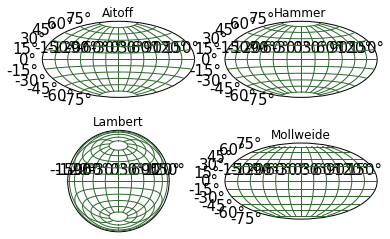

In [31]:
# http://matplotlib.org/examples/pylab_examples/geo_demo.html
import numpy as np
#np.seterr("raise")

from pylab import *

subplot(221, projection="aitoff")
title("Aitoff")
grid(True)

subplot(222, projection="hammer")
title("Hammer")
grid(True)

subplot(223, projection="lambert")
title("Lambert")
grid(True)

subplot(224, projection="mollweide")
title("Mollweide")
grid(True)

show()
